In [43]:
import cv2
import numpy as np
import requests
from PIL import Image
import matplotlib.pyplot as plt

In [44]:
def add_logo_watermark(image_url, logo_url):
    # Reading image from URL
    image = Image.open(requests.get(image_url, stream=True).raw)
    image_resized = image.resize((500, 300))
    image_array = np.array(image_resized.convert('RGBA'))
    h_image, w_image, _ = image_array.shape

    # Reading logo from URL and making it transparent
    logo = Image.open(requests.get(logo_url, stream=True).raw)
    logo_resized = logo.resize((20, 20))
    logo_array = np.array(logo_resized.convert('RGBA'))
    logo_array[:, :, 3] = 100  # Set transparency level (0-255)

    # Calculate dimensions for the watermark logo
    logo_height, logo_width, _ = logo_array.shape

    # Calculate position for centering the logo
    center_x = (w_image - logo_width) // 2
    center_y = (h_image - logo_height) // 2

    # Place the logo at the center of the image
    image_array[center_y:center_y + logo_height, center_x:center_x + logo_width] = logo_array[:, :, :]

    # Calculate gap between watermark logos
    gap = 30

    # Repeat the logo watermark across the entire image with a certain gap
    for i in range(center_y, h_image - logo_height, logo_height + gap):
        for j in range(center_x, w_image - logo_width, logo_width + gap):
            if center_x <= j <= center_x + logo_width and center_y <= i <= center_y + logo_height:
                continue  # Skip the region where the central logo is placed
            image_array[i:i + logo_height, j:j + logo_width] = logo_array[:, :, :]

    # Plotting the watermarked image
    plt.imshow(image_array)
    plt.axis('off')
    plt.show()


In [45]:
def add_logo_watermark(image_url, logo_url):
    # Reading image from URL
    image = Image.open(requests.get(image_url, stream=True).raw)
    image_resized = image.resize((500, 300))
    image_array = np.array(image_resized.convert('RGBA'))

    # Reading logo from URL and making it transparent
    logo = Image.open(requests.get(logo_url, stream=True).raw)
    logo_resized = logo.resize((20, 20))
    logo_array = np.array(logo_resized.convert('RGBA'))
    logo_array[:, :, 3] = 100  # Set transparency level (0-255)

    # Calculate position for centering the logo
    h_image, w_image, _ = image_array.shape
    center_x = (w_image - logo_array.shape[1]) // 2
    center_y = (h_image - logo_array.shape[0]) // 2

    # Place the logo at the center of the image
    image_array[center_y:center_y + logo_array.shape[0], center_x:center_x + logo_array.shape[1]] = logo_array[:, :, :]

    # Plotting the watermarked image
    plt.imshow(image_array)
    plt.axis('off')
    plt.show()


In [46]:
# URLs for the image and logo
image_url = 'https://www.bmw.in/content/dam/bmw/common/all-models/m-series/m2-coupe/2022/Highlights/bmw-m-series-m2-coupe-gallery-image-impressions-01_1920.jpg.asset.1663324548995.jpg'
logo_url = 'https://www.bmw.com/content/dam/bmw/marketBMWCOM/bmw_com/categories/automotive-life/explained-m/exlm-og.jpg'


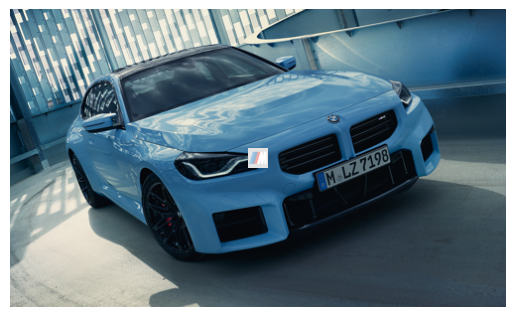

In [47]:
# Adding logo watermark
add_logo_watermark(image_url, logo_url)

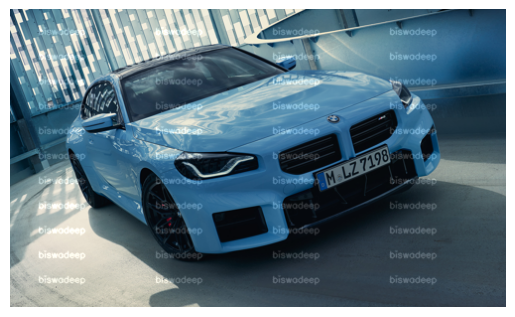

In [48]:
# Adding text watermark
add_text_watermark(image_url, 'biswadeep')